<a href="https://colab.research.google.com/github/ajitkumarkp/ML/blob/master/Darknet_YOLO_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Darknet source 

In [1]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 13057, done.
remote: Total 13057 (delta 0), reused 0 (delta 0), pack-reused 13057
Receiving objects: 100% (13057/13057), 11.76 MiB | 11.76 MiB/s, done.
Resolving deltas: 100% (8922/8922), done.


In [0]:
%cd darknet/

# Compile Darknet 

In [0]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [7]:
print("Building. . . It might take 2 minutes")
!make &> build_log.txt
print("Build completed.")

Building. . . It might take 2 minutes
Build completed.


# Download YOLO Weights 

In [8]:
# Author's link https://pjreddie.com/media/files/yolov3.weights is slow to download
!wget "https://www.dropbox.com/s/bdafgfb7qzcwh1o/yolov3.weights?dl=1" -O yolov3.weights

--2020-04-16 15:18:43--  https://www.dropbox.com/s/bdafgfb7qzcwh1o/yolov3.weights?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/bdafgfb7qzcwh1o/yolov3.weights [following]
--2020-04-16 15:18:43--  https://www.dropbox.com/s/dl/bdafgfb7qzcwh1o/yolov3.weights
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6e4a409cc3d3e9fc985086cba8.dl.dropboxusercontent.com/cd/0/get/A187zpDL8KrlJVKvrzRsTsZfk5kt4hZKOn-CfukljgdDQw7YujMAKIB186GRrkQ6NEqu_zEEqUyx3yxWla-QI0YD-gPoVO3kfkU4TktzZloRgk1S0BaeGpfXmxDzV47Dws8/file?dl=1# [following]
--2020-04-16 15:18:43--  https://uc6e4a409cc3d3e9fc985086cba8.dl.dropboxusercontent.com/cd/0/get/A187zpDL8KrlJVKvrzRsTsZfk5kt4hZKOn-CfukljgdDQw7YujMAKIB186GRrkQ6NEqu_zEEqUyx3yxWla-QI0YD-gPoVO3kfkU4Tkt

# Download sample image 

In [9]:
!wget "https://www.dropbox.com/s/aad0pw7pf4ygs4b/traffic_1.jpg?dl=1" -O traffic.jpg

--2020-04-16 15:22:05--  https://www.dropbox.com/s/aad0pw7pf4ygs4b/traffic_1.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/aad0pw7pf4ygs4b/traffic_1.jpg [following]
--2020-04-16 15:22:05--  https://www.dropbox.com/s/dl/aad0pw7pf4ygs4b/traffic_1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef95d6d0810834afd0bb3f2d0a.dl.dropboxusercontent.com/cd/0/get/A1_gCXyACdeAU1obHMtJqQpw8vVYzCDWbZZVH0UwctPeGlQ9F_CMGTFv9Ab2ymjNKZCHX0QXDkyYOob38I7b4buHkxDC2STT_TWf-YPaFy3EJqddDD1Ee1sKmbqvgWneG_s/file?dl=1# [following]
--2020-04-16 15:22:05--  https://ucef95d6d0810834afd0bb3f2d0a.dl.dropboxusercontent.com/cd/0/get/A1_gCXyACdeAU1obHMtJqQpw8vVYzCDWbZZVH0UwctPeGlQ9F_CMGTFv9Ab2ymjNKZCHX0QXDkyYOob38I7b4buHkxDC2STT_TWf-YPaFy

# Forward pass for detection  

In [10]:
!./darknet detect cfg/yolov3.cfg yolov3.weights traffic.jpg -thresh 0.5

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

# Results

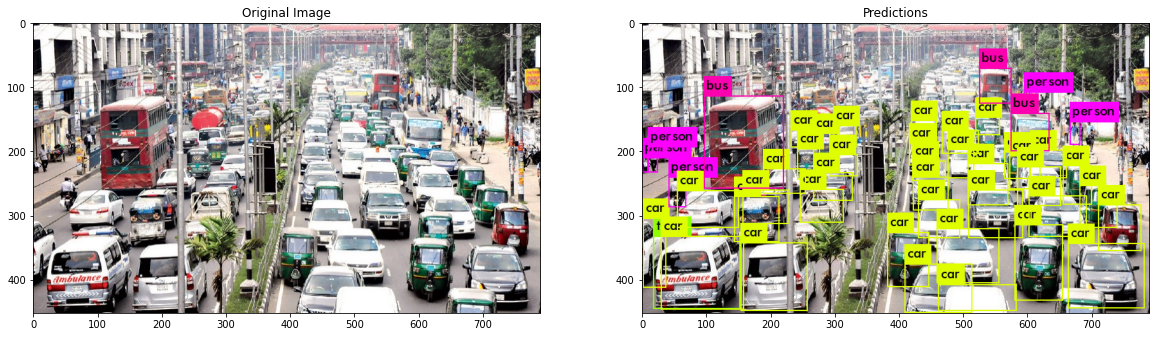

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
src = cv2.imread("traffic.jpg",1)
output = cv2.imread("predictions.jpg")

plt.figure(figsize=[20,8])
plt.subplot(121)
plt.imshow(src[:,:,::-1])
plt.title("Original Image")
plt.subplot(122)
plt.imshow(output[:,:,::-1])
plt.title("Predictions")
plt.show()